<a href="https://colab.research.google.com/github/mohammedmoin44/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:
• Sex: male or female("M" or "F")\
• Age: Age of the patient;(Continuous - Although the recorded ages have been\ truncated to\
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")\
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)\
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)\
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)\
• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)\
• Sys BP: systolic blood pressure (Continuous)\
• Dia BP: diastolic blood pressure (Continuous)\
• BMI: Body Mass Index (Continuous)\
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)\
• Glucose: glucose level (Continuous)\
Predict variable (desired target)\
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

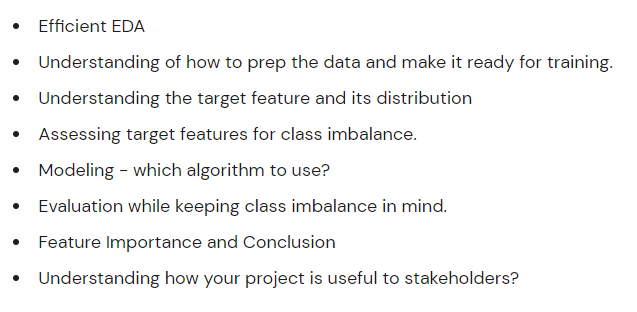

In [3]:
#Read file using pandas
df = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [4]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Leaving sex and is_smoking allother variables are type numeric


In [6]:
df.shape

(3390, 17)

#EDA(Explanatory Data Analysis)

##Univariate Analysis

plotting for categorical variables

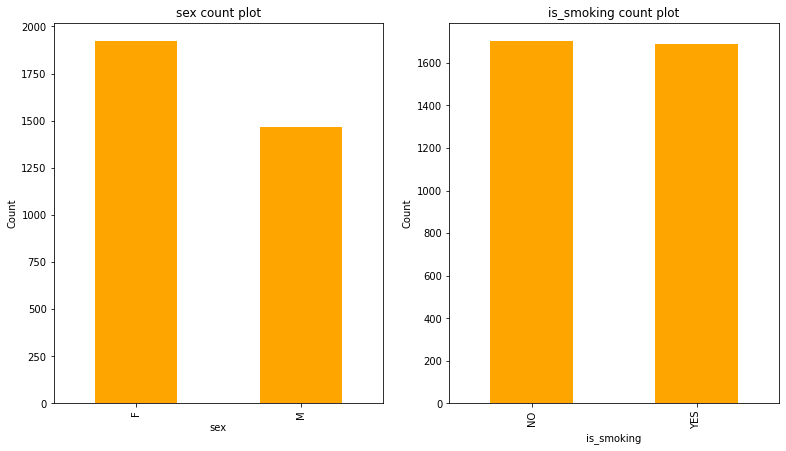

In [7]:
plt.figure(figsize=(13,7))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):

    ax = plt.subplot(1,2, i+1)
    df[col].value_counts().plot.bar(color='orange')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} ''count plot')


In [8]:
df1 = df.drop(columns=['TenYearCHD','BPMeds','prevalentStroke','prevalentHyp','diabetes','id','education'])

Plotting For Continuous variable

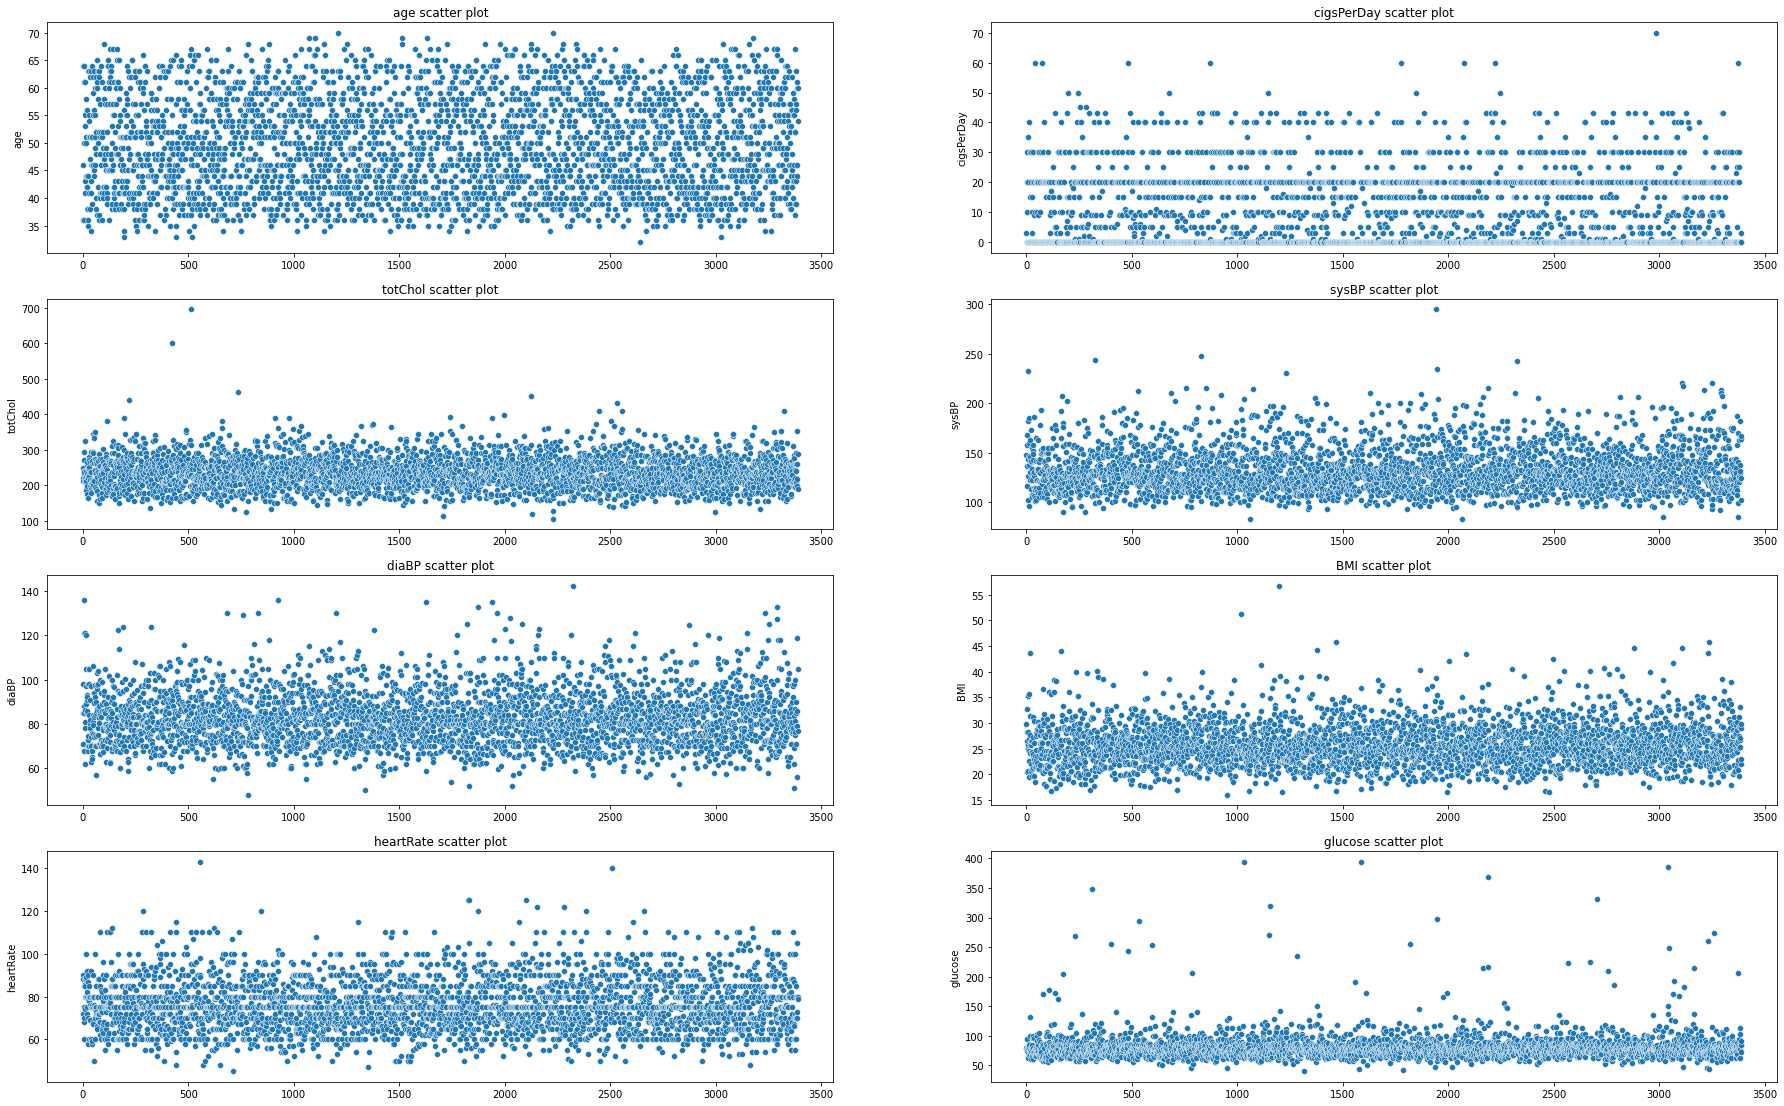

In [9]:
plt.figure(figsize=(31,50))
for i, col in enumerate(df1.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(10,2, i+1)
    sns.scatterplot(data=df[col])
    plt.title(f'{col} ''scatter plot')



From above visualization 


*   Hear Rate is mostly below 100
*   Gluscose level is mostly below 150
*   BMI index in most of data is below 35
*   And Total Cholestrol is below 300



Ploting for discrete variable

In [10]:
df2 = df[['TenYearCHD','BPMeds','prevalentStroke','prevalentHyp','diabetes','education']]

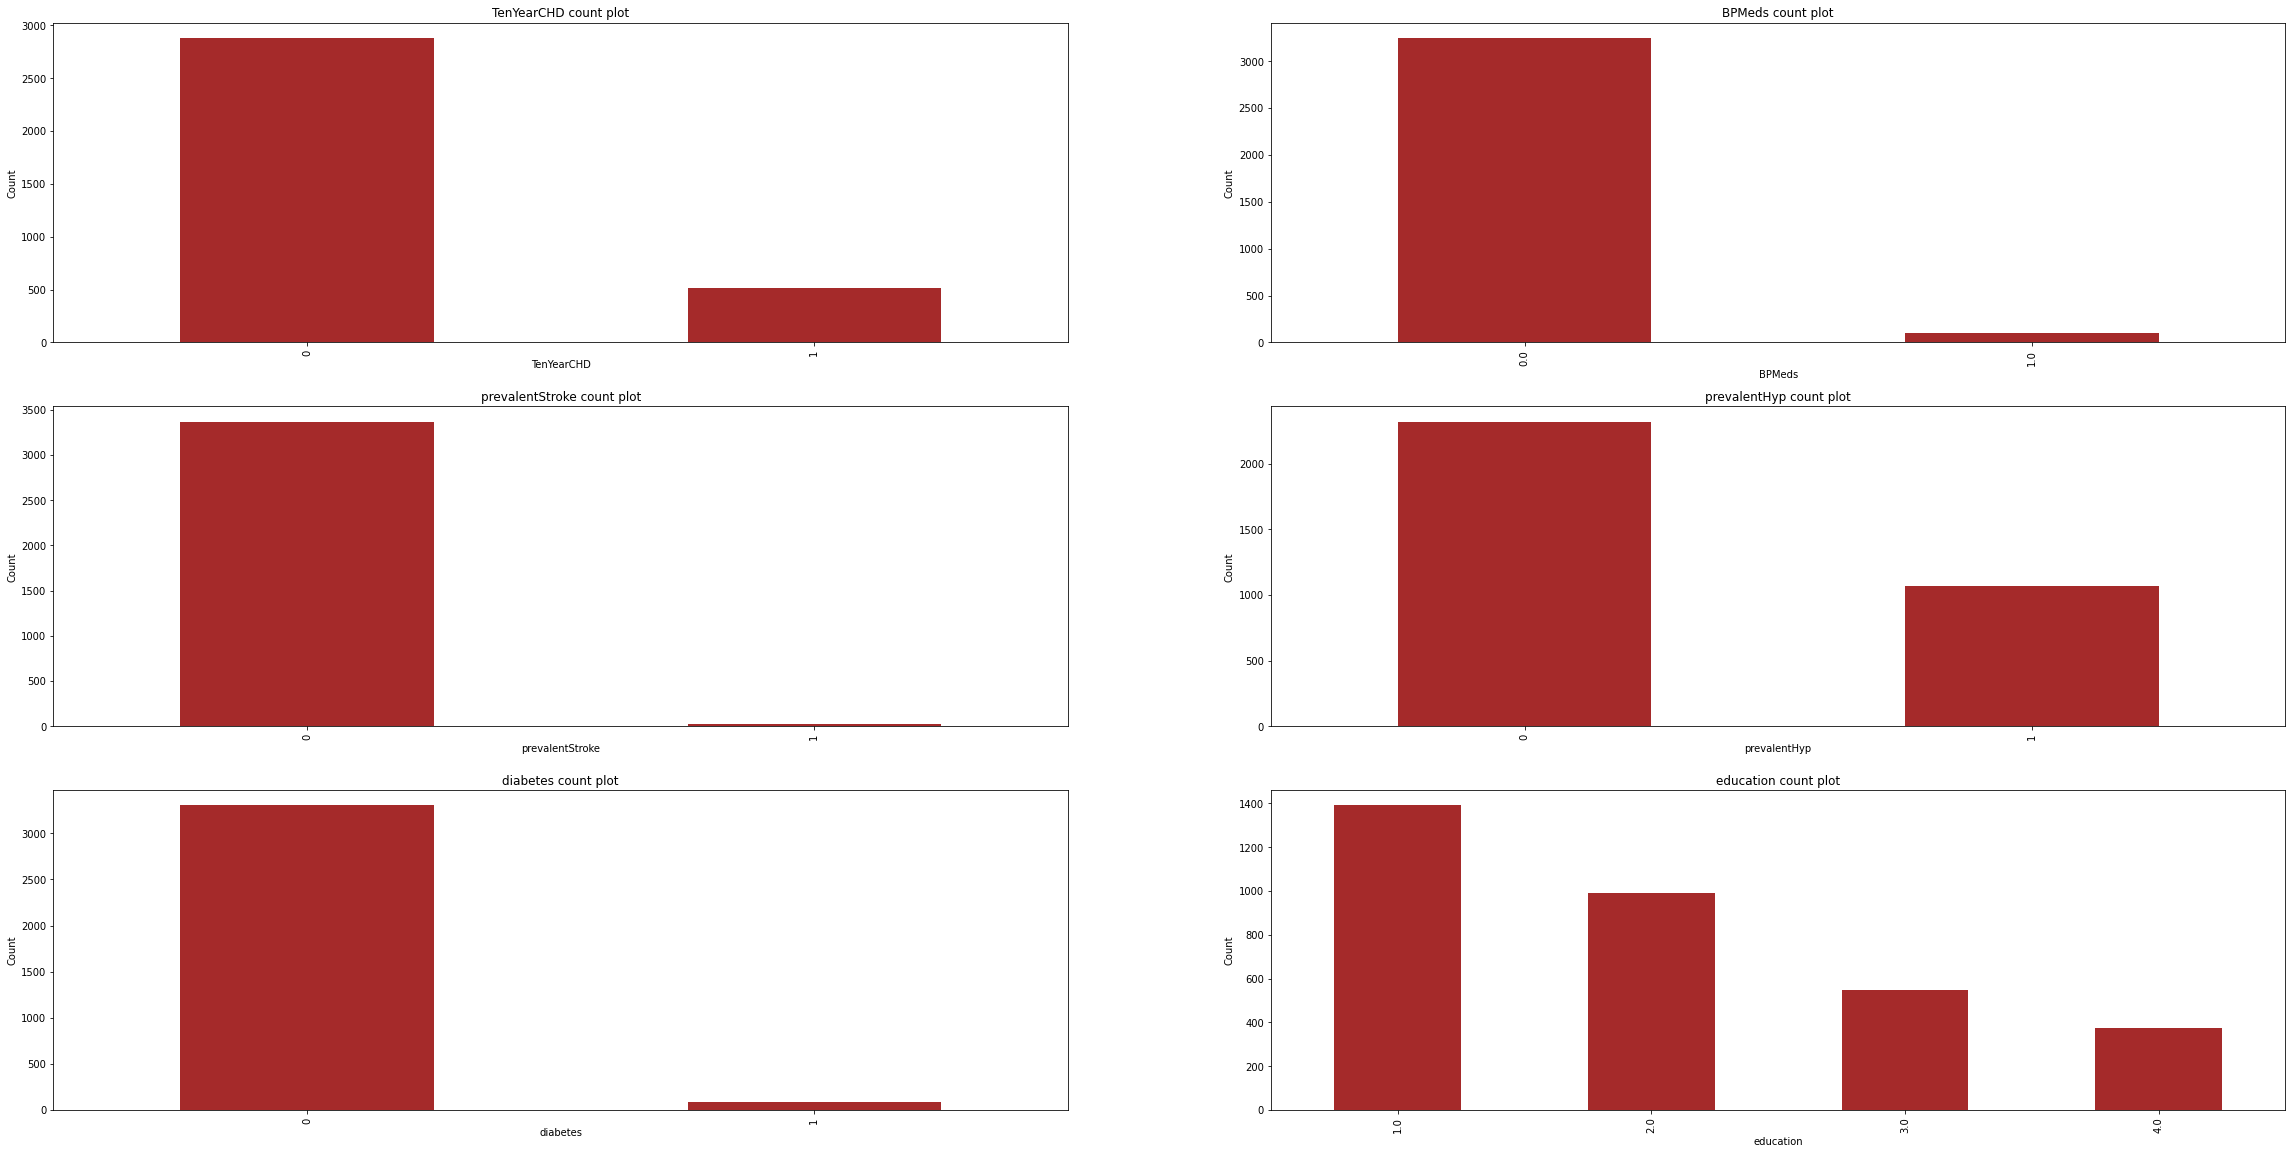

In [11]:
plt.figure(figsize=(40,20))
for i, col in enumerate(df2):
    ax = plt.subplot(3,2, i+1)
    df[col].value_counts().plot.bar(color='brown')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} ''count plot')


In [12]:
df2['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [13]:
df2['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [14]:
df2['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [15]:
df2['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [16]:
df2['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [17]:
df2['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [18]:
df3 = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD','glucose']

##Bivariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


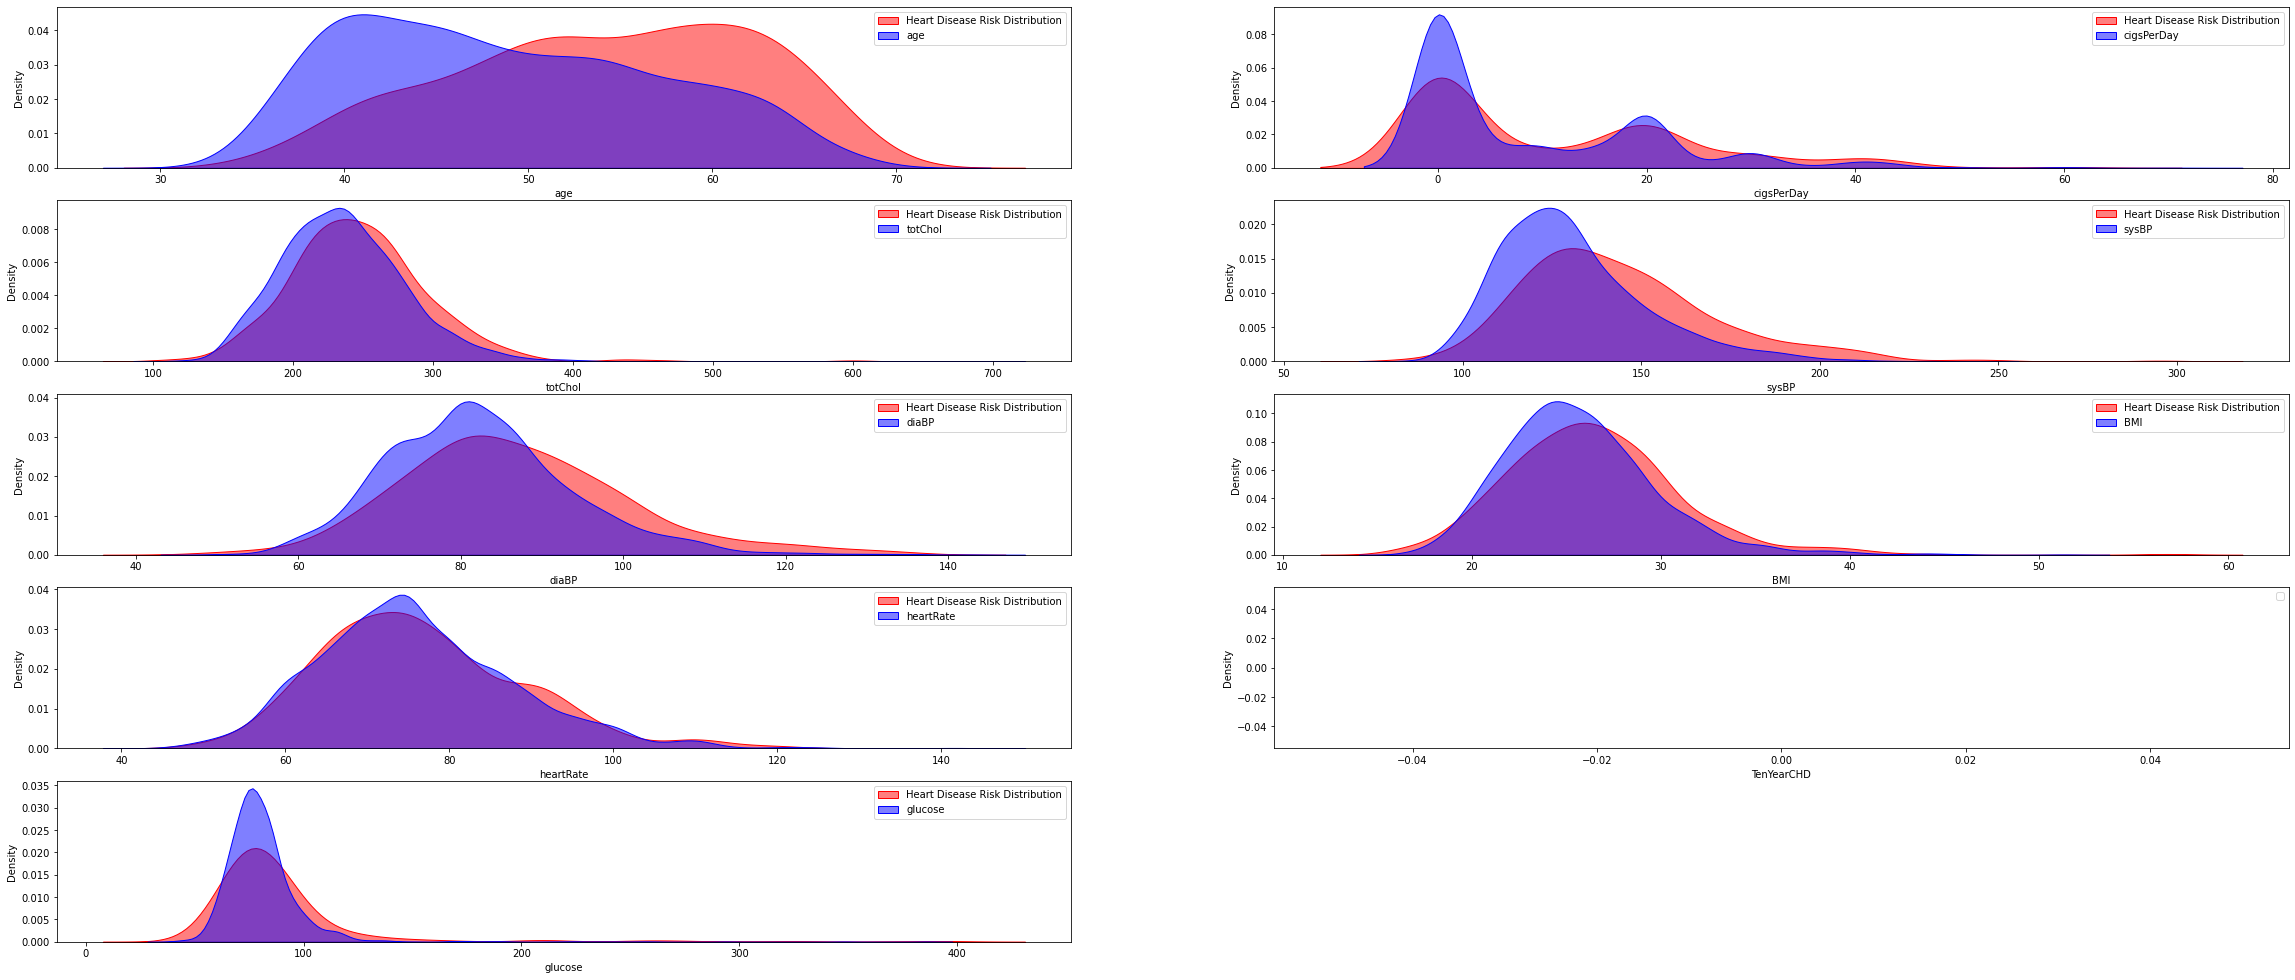

In [19]:
#ploting TenYearCHD vs Other continues variables
plt.figure(figsize=(40,35))
for i, col in enumerate(df3):
    ax = plt.subplot(10,2, i+1)
    ax = sns.kdeplot(df[df['TenYearCHD']==1][col], alpha=0.5, color="red",shade=True, label="Heart Disease Risk Distribution")
    ax = sns.kdeplot(df[df['TenYearCHD']==0][col], alpha=0.5, color="Blue",shade=True, label=col)
    ax.set_xlabel(col)
    ax.legend()

Age Seems to have high impact on heat disease then any other variables

<Figure size 2880x1440 with 0 Axes>

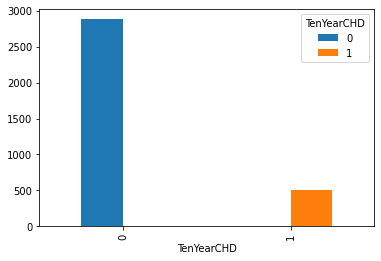

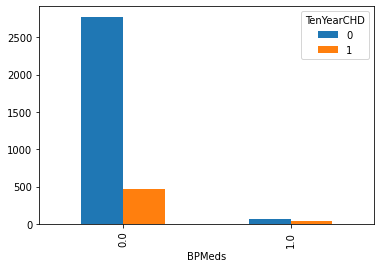

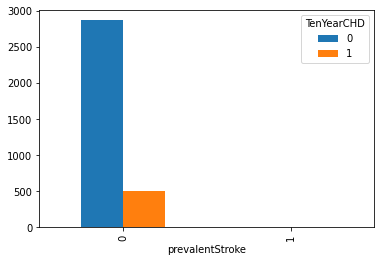

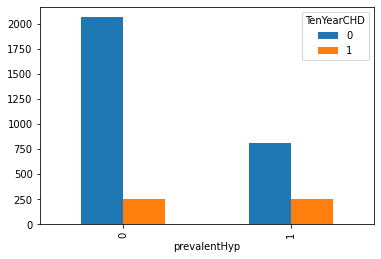

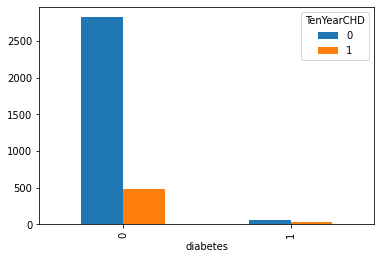

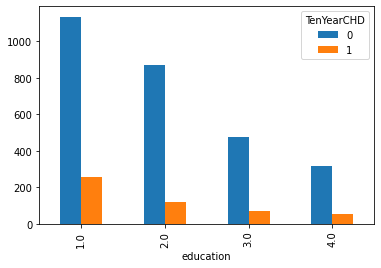

In [20]:
#Comparison TenYearCHD vs other discrete variables
plt.figure(figsize=(40,20))
for i, col in enumerate(df2):
  ax = pd.crosstab(df2[col],df2['TenYearCHD']).plot(kind='bar')
    


Most of the variables are imbalanced

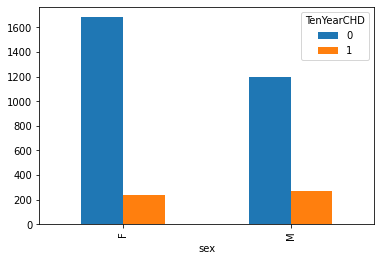

In [21]:
pd.crosstab(df['sex'],df['TenYearCHD']).plot(kind='bar')

We have more data on females than males

In [22]:
df.groupby('sex')['TenYearCHD'].value_counts()

sex  TenYearCHD
F    0             1684
     1              239
M    0             1195
     1              272
Name: TenYearCHD, dtype: int64

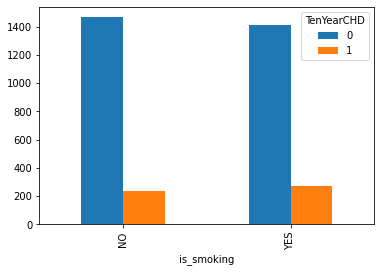

In [23]:
pd.crosstab(df['is_smoking'],df['TenYearCHD']).plot(kind='bar')

##Multi Variant  Analysis

In [ ]:
sns.pairplot(data=df)

In [25]:
corr = df.corr()

Dealing with Multicolinearity 

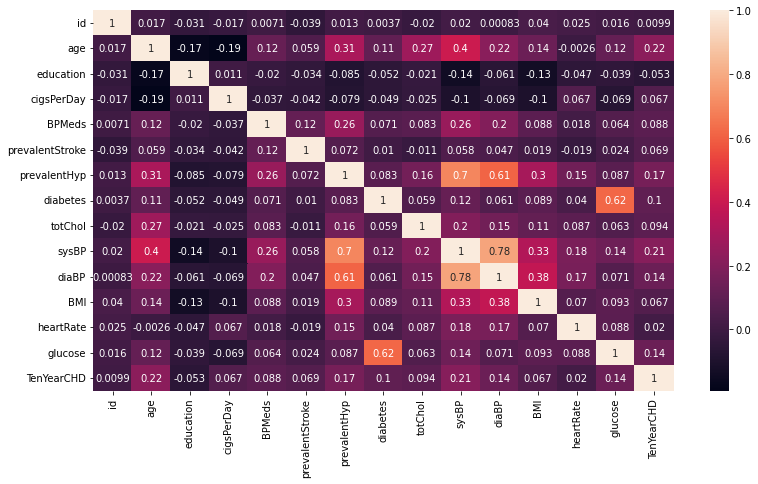

In [26]:
plt.figure(figsize=(13,7))
sns.heatmap(data=corr,annot=True)

#Feature Engineering 

In [72]:
df4 = df.copy()
df4

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


##Null *Values*

In [73]:
df4.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Since NA  values are in insignificant numbers it can be removed

In [74]:
df4.dropna(inplace=True)

In [75]:
df4

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


Detecting Outliers 

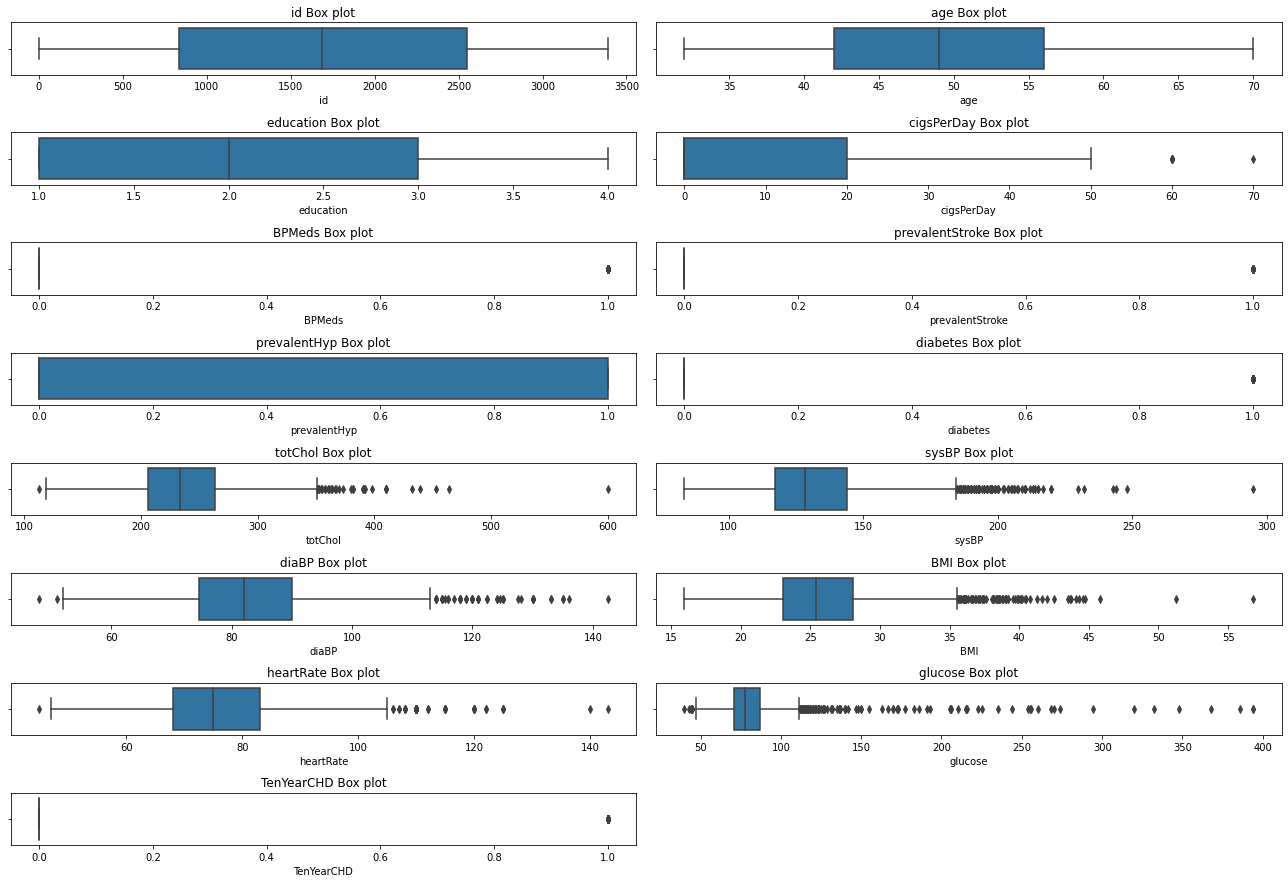

In [76]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(df4.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(10,2, i+1)
    sns.boxplot(data= df4,x=col)
    plt.xlabel(col)
    plt.title(f'{col} ''Box plot')
plt.tight_layout()

In [77]:
df4 = df4[df4['totChol']<600.0]
df4 = df4[df4['sysBP']<295.0]

In [78]:
df4.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,1693.219145,49.501538,1.965812,9.118974,0.030085,0.006154,0.313846,0.026667,236.999658,132.561709,82.884615,25.791744,75.882051,81.918632,0.151111
std,986.072020,8.595827,1.017390,11.884456,0.170852,0.078218,0.464134,0.161135,44.119959,22.125370,12.042770,4.124506,11.971528,24.090250,0.358218
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,837.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000,0.000000
50%,1689.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2548.000000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


##Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder as le_En

applying label encoding 

Since there are only 2 object type varible which can be converted to 0 and 1 

In [80]:
Var = list(['sex','is_smoking'])
df4[Var] = df4[Var].apply(le_En().fit_transform)

In [81]:
df4

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


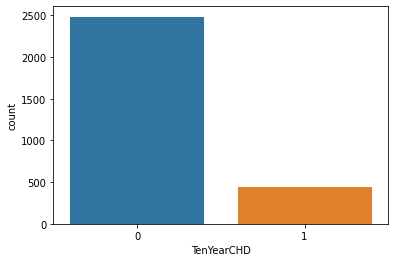

In [82]:
sns.countplot(x='TenYearCHD',data = df4)

From above fig we can see that the target variable is imbalanced 

##Over Sampling

In [100]:
target1=df4[df4['TenYearCHD']==1]
target0=df4[df4['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()

0    2483
1    2483
Name: TenYearCHD, dtype: int64

In [101]:
data=target
np.shape(data)

(4966, 17)

In [102]:
df7 = data

In [119]:
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

In [120]:
X.pop('id')

1          1
2          2
4          4
6          6
7          7
        ... 
453      453
2055    2055
2187    2187
2281    2281
1636    1636
Name: id, Length: 4966, dtype: int64

##Feature Importance

In [121]:
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [122]:
best=SelectKBest(score_func=chi2, k=9)
fit=best.fit(X,y)

data_rank=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)
score=pd.concat([data_columns,data_rank],axis=1)
score.columns=['Feature','Score']
print(score.nlargest(10,'Score'))

         Feature        Score
10         sysBP  1604.540321
14       glucose  1227.117975
0            age   754.234470
9        totChol   704.160142
4     cigsPerDay   544.845560
11         diaBP   292.342760
7   prevalentHyp   152.544330
8       diabetes    59.948357
5         BPMeds    54.277533
2            sex    34.498554


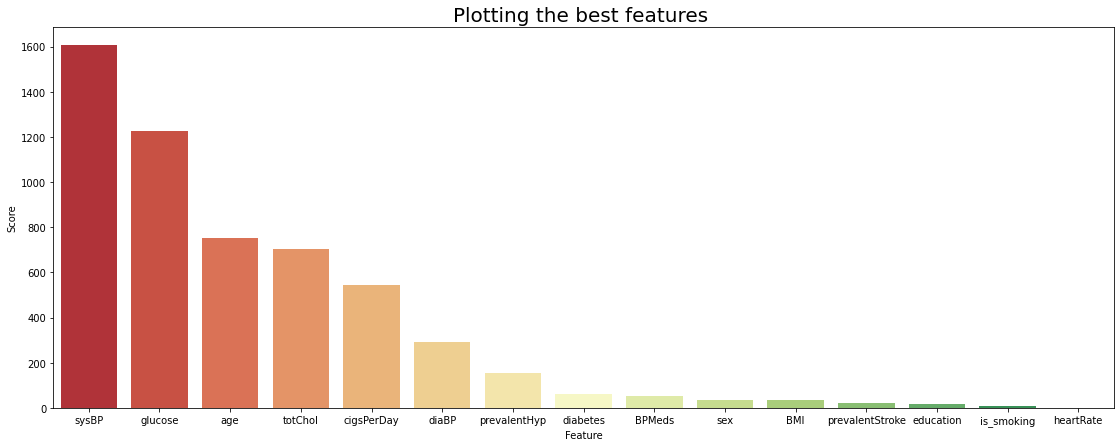

In [123]:
score=score.sort_values(by="Score", ascending=False)
plt.figure(figsize=(19,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=score,palette='RdYlGn')
plt.title("Plotting the best features ", size=20)
plt.show()
     

In [124]:
df9 = score["Feature"].tolist()[:9]
df9

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds']

In [125]:
df10 = X[df9]
X = df10

In [126]:
X.shape

(4966, 9)

In [128]:
y.shape

(4966,)

In [129]:

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,stratify= y,random_state= 45)

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Modeling

In [148]:
#importing Classification Algorithms 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def predict(ml_model,sm_X_train,sm_y_train):
    model=ml_model.fit(sm_X_train,sm_y_train)
    y_pred=model.predict(X_test)
    cross =cross_val_score(ml_model,sm_X_train,sm_y_train,cv=5).mean()

    data = accuracy_score(y_pred,y_test)
    print('Accuracy is', f'{data*100}')
    print('Cross Val Accuracy is',  f'{cross*100}')
    print("Classification Report: \n", classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print('confusion Matrix''\n',f'{cm}')
    
     
    
    

In [149]:
predict(svm.SVC(),X_train,y_train)

Accuracy is 68.66014951121335
Cross Val Accuracy is 67.02834377324982
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       869
           1       0.68      0.72      0.70       870

    accuracy                           0.69      1739
   macro avg       0.69      0.69      0.69      1739
weighted avg       0.69      0.69      0.69      1739

confusion Matrix
 [[570 299]
 [246 624]]


In [150]:
predict(RandomForestClassifier(),X_train,y_train)

Accuracy is 80.85106382978722
Cross Val Accuracy is 91.57069143446851
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       869
           1       0.89      0.70      0.79       870

    accuracy                           0.81      1739
   macro avg       0.82      0.81      0.81      1739
weighted avg       0.82      0.81      0.81      1739

confusion Matrix
 [[793  76]
 [257 613]]


In [151]:
predict(LogisticRegression(),X_train,y_train)

Accuracy is 69.00517538815411
Cross Val Accuracy is 67.18362253101975
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       869
           1       0.68      0.72      0.70       870

    accuracy                           0.69      1739
   macro avg       0.69      0.69      0.69      1739
weighted avg       0.69      0.69      0.69      1739

confusion Matrix
 [[575 294]
 [245 625]]


In [152]:
predict(XGBClassifier(),X_train,y_train)

Accuracy is 69.69522714203565
Cross Val Accuracy is 70.18931048551612
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       869
           1       0.69      0.71      0.70       870

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739

confusion Matrix
 [[597 272]
 [255 615]]


##Hyperparameter  Tunning

Using GridSearchCV for hyperparameter Tunning

In [140]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_params = {
    'SVC': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,40,60,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Xgboost': {
        'model': XGBClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    }
   }

In [141]:
scores = []
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

for model_name, mp in model_params.items():

    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=25)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)

    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df8 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df8

,model,best_score,best_params
0,SVC,0.671524,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.919733,{'n_estimators': 40}
2,logistic_regression,0.669357,{'C': 10}
3,Xgboost,0.671531,{'n_estimators': 10}


##Model Selection

In [154]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)


print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       869
           1       0.89      0.72      0.79       870

    accuracy                           0.81      1739
   macro avg       0.83      0.81      0.81      1739
weighted avg       0.83      0.81      0.81      1739



#Conclusion:
